# Exploratory data analysis of the Drug Consumption data set

## Introduction

The database was collected by Elaine Fehrman between March 2011 and March 2012.
An online survey tool from Survey Gizmo was employed to gather data with maximum anonymity, this being particularly relevant to canvassing respondents’ views, given the sensitive nature of drug use. All participants were required to declare themselves at least 18 years of age prior to informed consent being given.

Participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine, and volatile substance abuse (VSA)) and one fictitious drug (Semeron) which was introduced to identify over-claimers. It was recognised at the outset that drug use research regularly (and spuriously) dichotomises individuals as users or non-users, without due regard to their frequency or duration/desistance of drug use (Ragan & Beaver, 2010). In this study, finer distinctions concerning the measurement of drug use have been deployed, due to the potential for the existence of qualitative differences amongst individuals with varying usage levels. In relation to each drug, respondents were asked to indicate on if they never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day. 

The pupose of this document is to provide information for the features included in this dataset and state the inital findings via exploratory data analysis and form conclusions. 

## Data
The database contains records for 1885 respondents. For each respondent 12 attributes are known: personality measurements which include 
- NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness)
- BIS-11 (impulsivity) (ordinal)
- ImpSS (sensation seeking) (ordinal)
- Level of education
- Age
- Gender
- Country of residence 
- Ethnicity. 

In addition, participants were questioned concerning their use of 18 legal and illegal drugs (We are including 8 of them in our analysis for simplification):
- Alcohol
- Cannabis
- Chocolate
- Caffeine
- Cocaine
- Mushrooms
- Nicotine
- Volatile substance abuse 

For each drug they selected either never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day. The database contains 18 classification problems. Each of the independent label variables contains seven classes: **Never Used (CL0)**, **Used over a Decade Ago (CL1)**, **Used in Last Decade (CL2)**, **Used in Last Year (CL3)**, **Used in Last Month (CL4)**, **Used in Last Week (CL5)**, and **Used in Last Day (CL6)**.

The NEO-FFI-R attributes can be defined as follows:
- Neuroticism is defined by how sensitive, emotional and prone to worry an individual may be. 
- Extraversion is a measure of how energetic, sociable and friendly a person is.
- Openness indicates how open-minded a person is.
- Agreeableness is a personality trait that describes a person's ability to put others needs before their own. 
- Contentiousness indicates how likely is a person to cause disagreement or argument.

For the above attributes:
- Scores range from 12-60. 
- Low Scores are between 12 and 26
- Moderate Scores are between 27 and 45
- High Scores are between 46 and 60.


## Analysis

In [10]:
import altair as alt
import pandas as pd
from sklearn.model_selection import train_test_split
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')
alt.renderers.enable('html')
alt.renderers.enable('svg')

RendererRegistry.enable('svg')

In [11]:
dataset = pd.read_csv("../data/preprocessed/train.csv")
train_df, test_df = train_test_split(dataset, train_size=0.8, shuffle=False, random_state=522)

In [12]:
feature_columns = [ 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism',
                    'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
                    'Impulsiveness', 'SensationSeeking']

target_columns = [  'Chocolate', 'Caffeine',  'Nicotine', 'Alcohol', 
                    'Cannabis', 'Mushrooms','Cocaine', 'VSA']

class_df = train_df.melt(
    id_vars=feature_columns,
    value_vars = target_columns,
    var_name = "Drug",
    value_name = 'Class'
)

class_df['Class'] = class_df['Class'].str.replace("CL0", "0")
class_df['Class'] = class_df['Class'].str.replace("CL1", "1")
class_df['Class'] = class_df['Class'].str.replace("CL2", "2")
class_df['Class'] = class_df['Class'].str.replace("CL3", "3")
class_df['Class'] = class_df['Class'].str.replace("CL4", "4")
class_df['Class'] = class_df['Class'].str.replace("CL5", "5")
class_df['Class'] = class_df['Class'].str.replace("CL6", "6")

class_df["Class"].astype(int)

frequency_order = ["Never Used",
                   "Used over a Decade Ago",
                   "Used in Last Decade",
                   "Used in Last Year",
                   "Used in Last Month",
                   "Used in Last Week",
                   "Used in Last Day"]
axis_labels = ""
for i in range(len(frequency_order)):
    axis_labels += f"datum.label == {i} ? '{frequency_order[i]}' : "
axis_labels += "'Unknown'"

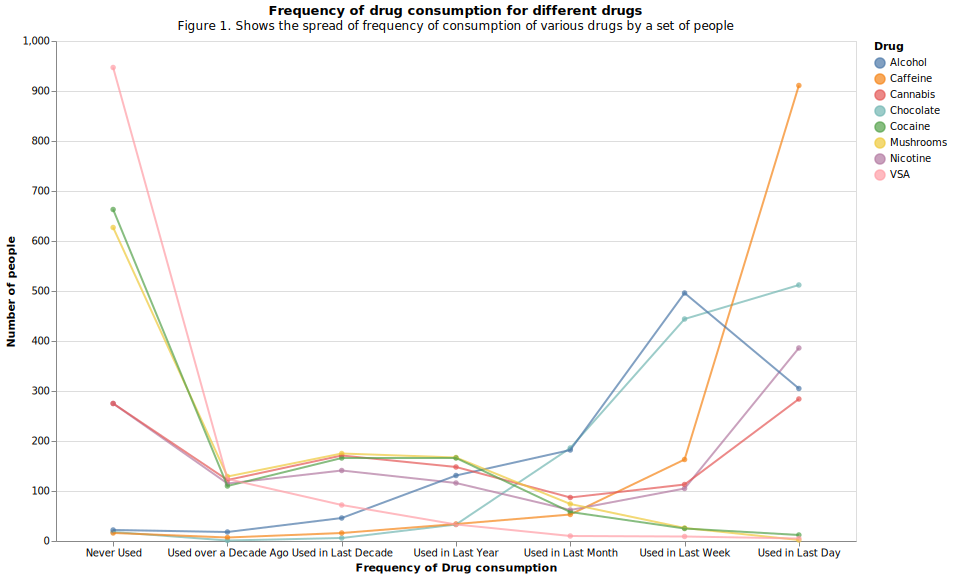

In [13]:
select_drug = alt.selection_multi(fields=['Drug'], bind='legend')

point_chart = alt.Chart(class_df).mark_point(filled=True).encode(
    x = alt.X("Class:O", 
              axis=alt.Axis(labelExpr=axis_labels, labelAngle=0), 
              title="Frequency of Drug consumption"),
    y = alt.Y("count()", title='Number of people'),
    tooltip='Drug',
    color = "Drug",
    opacity=alt.condition(select_drug, alt.value(0.7), alt.value(0.1))
).properties(
    title={
        "text": "Frequency of drug consumption for different drugs",
        "subtitle": "Figure 1. Shows the spread of frequency of consumption of various drugs by a set of people"
    },
    width = 800,
    height = 500
)

(point_chart + point_chart.mark_line()).add_selection(select_drug)


The above plot shows the frequency of usage of different kinds of drugs. On the X-axis, we plot the frequency of drug consumption in an increasing order (`Never Used` to `Used in the last day`). It is interesting to note the trends for different drugs as we can see that:
- For legal drugs like `Caffeine`, `Chocolate`, and `Alcohol`, More people have used it recently than many years ago.
- For drugs like `Mushrooms`, which are legal in a few countries included in the dataset and have medical uses, we see a higher number of people who have used it sometime in the last year/decade.
- For drugs like `Cannabis` and `Nicotine`, which are often consumed together and are also legal in a few countries included in the dataset, have a very similar trend line.
- For highly illegal substances, that have no medical use, like `Cocaine` and `VSA`, we see that a large proportion of the participants have either never consumed it or consumed it very long ago.

In [14]:
personality_df = train_df.melt(
    id_vars= ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'],
    value_vars = ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness'],
    var_name = "Measure",
    value_name = 'Value'
)

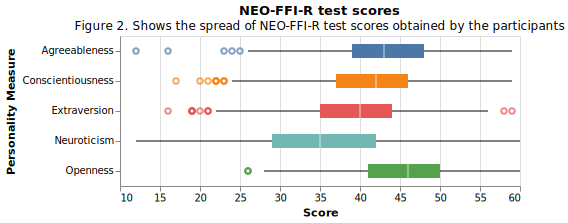

In [15]:
alt.Chart(personality_df).mark_boxplot().encode(
    x = alt.X('Value', scale=alt.Scale(zero=False), title='Score'),
    y = alt.Y("Measure", title="Personality Measure"),
    color = alt.Color("Measure",legend=None)
).properties(
    title={
        "text": "NEO-FFI-R test scores",
        "subtitle": "Figure 2. Shows the spread of NEO-FFI-R test scores obtained by the participants"
    },
    width=400,
    height=150
)

The above plot shows the distribution of the NEO-FFI-R scores for all the participants involved in this experiment. We can notice that a few points are not included in the whiskers of the boxplot for some of the traits which can be explained by the small sample size. A lower score does not imply incorrect information or an outlier because it is not unusual for a person to have a very low/high score as the NEO-FFI-R test is very subjective to the person. 

We can see the means of all the traits lie in the `Moderate` range except for the `Openness` trait. One reason for this could be that if a person is participating in an experiment which includes the collection of highly personal data, they are probably very open-minded people and have a high level of openness to trying new things! 

In [16]:
categorical_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

for feat in categorical_features:
    df = train_df.groupby(feat)[feat].agg(['count'])
    df['Proportion'] = round(df['count'] / df['count'].sum() * 100, 2)
    print('Proportion of categories across all Categorical variables:')
    print(df.to_markdown())
    print('\n\n\n')

Proportion of categories across all Categorical variables:
| Age   |   count |   Proportion |
|:------|--------:|-------------:|
| 18-24 |     389 |        32.42 |
| 25-34 |     321 |        26.75 |
| 35-44 |     227 |        18.92 |
| 45-54 |     187 |        15.58 |
| 55-64 |      63 |         5.25 |
| 65+   |      13 |         1.08 |




Proportion of categories across all Categorical variables:
| Gender   |   count |   Proportion |
|:---------|--------:|-------------:|
| Female   |     601 |        50.08 |
| Male     |     599 |        49.92 |




Proportion of categories across all Categorical variables:
| Education                                            |   count |   Proportion |
|:-----------------------------------------------------|--------:|-------------:|
| Doctorate degree                                     |      58 |         4.83 |
| Left school at 16 years                              |      71 |         5.92 |
| Left school at 17 years                              

Impulsiveness and Sensation Seeking are 2 numerical parameters that have been binned together to form categories. Hence we can create a barplot to represent the distribution of data points across different range of values (Histogram for the original data)

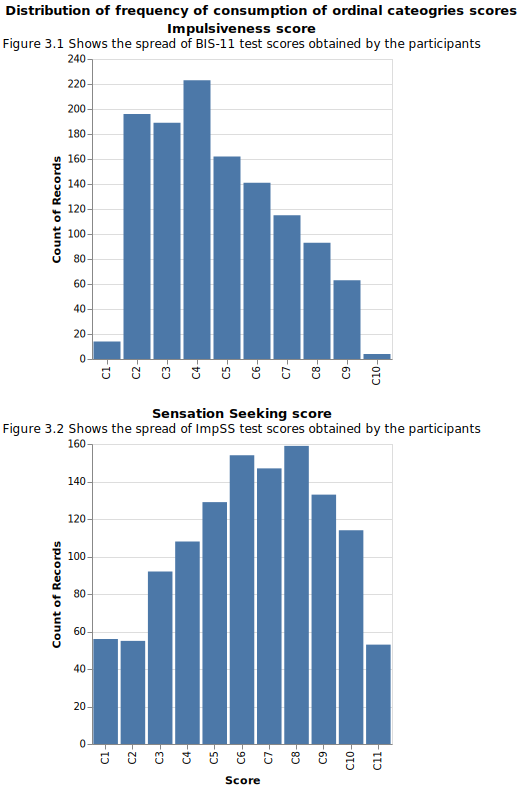

In [17]:
imp_chart = alt.Chart(train_df).mark_bar().encode(
    x=alt.X("Impulsiveness", sort=[f"C{i}" for i in range(1,11)], title=""),
    y=alt.Y("count()")
).properties(
    width=300,
    title={
        'text': 'Impulsiveness score',
        'subtitle': "Figure 3.1 Shows the spread of BIS-11 test scores obtained by the participants"
    }
)
ss_chart = alt.Chart(train_df).mark_bar().encode(
    x=alt.X("SensationSeeking", sort=[f"C{i}" for i in range(1,12)], title="Score"),
    y="count()"
).properties(
    width=300,
    title={
        'text': 'Sensation Seeking score',
        'subtitle': "Figure 3.2 Shows the spread of ImpSS test scores obtained by the participants"
    }
)
(imp_chart & ss_chart).properties(
    title={
        "text": "Distribution of frequency of consumption of ordinal cateogries scores"
    },
)

Since these 2 features are ordinal, we can see from the above histograms that most of the data points are clustered around the mid values as compared to the extreme values.

## References

- [Sample Project (Breast Cancer Prediction)](https://github.com/ttimbers/breast_cancer_predictor/tree/master/src)
- [Drug Consumption UCI repository](https://archive.ics.uci.edu/ml/datasets/Drug%2Bconsumption%2B%28quantified%29)
- [Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00373/)
- [Visualization Notes from DSCI-531](https://pages.github.ubc.ca/mds-2022-23/DSCI_531_viz-1_students/lectures/8-figure-composition.html)